# NYC Car Crashes EDA

## Traffic Volume

In [1]:
import numpy as np 
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point, LineString
from shapely.geometry.polygon import Polygon
from shapely import wkt
import matplotlib.pyplot as plt

In [2]:
streets = gpd.GeoDataFrame.from_file('geo_export_ccfbdf2d-83b4-4827-a495-e26464c3c50b.shp')
streets

borough  date_edit_    time_edit_       feat_type jurisdicti  \
0      Manhattan  2021-07-09  00:00:00.000       Mapped_St        NYC   
1      Manhattan  2021-07-09  00:00:00.000  Infrastructure        NYC   
2      Manhattan  2021-07-09  00:00:00.000  Infrastructure        NYC   
3      Manhattan  2021-07-09  00:00:00.000       Mapped_St        NYC   
4      Manhattan  2021-07-09  00:00:00.000  Infrastructure        NYC   
...          ...         ...           ...             ...        ...   
67941      Bronx  2022-09-08  00:00:00.000  Infrastructure       None   
67942      Bronx  2022-09-08  00:00:00.000      Water_edge     N.Y.C.   
67943      Bronx  2022-09-08  00:00:00.000  Infrastructure       None   
67944  Manhattan  2022-09-09  00:00:00.000  Infrastructure       None   
67945   Brooklyn  2022-09-15  00:00:00.000       Mapped_St        NYC   

      record_st                                           geometry  
0            No  LINESTRING (-73.96350 40.76885, -73.96368 40.7...  
1            NA  LINESTRING (-73.99435 40.71432, -73.99434 40.7...  
2            NA  LINESTRING (-73.94929 40.79085, -73.94927 40.7...  
3            No  LINESTRING (-74.00395 40.72996, -74.00421 40.7...  
4            NA  LINESTRING (-73.93803 40.80628, -73.93803 40.8...  
...         ...                                                ...  
67941      None  LINESTRING (-73.82725 40.86046, -73.82734 40.8...  
67942      None  MULTILINESTRING ((-73.79241 40.85603, -73.7923...  
67943      None  LINESTRING (-73.79252 40.85588, -73.79252 40.8...  
67944      None  LINESTRING (-74.00745 40.74858, -74.00875 40.7...  
67945        No  LINESTRING (-73.95372 40.57557, -73.95351 40.5...  

[67946 rows x 7 columns]

In [3]:
traffic = pd.read_csv('traffic_matched.csv')
traffic = traffic.dropna(subset = ['geometry'])
traffic['geometry'] = traffic['geometry'].astype(str).apply(wkt.loads)
traffic = gpd.GeoDataFrame(traffic, geometry = 'geometry')
traffic

C:\Users\Andy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (31,32,33,34,36,37,43) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


ID  SegmentID      Roadway Name             From                To  \
0       1      15540      BEACH STREET      UNION PLACE  VAN DUZER STREET   
1       2      15540      BEACH STREET      UNION PLACE  VAN DUZER STREET   
2       3      15540      BEACH STREET      UNION PLACE  VAN DUZER STREET   
3       4      15540      BEACH STREET      UNION PLACE  VAN DUZER STREET   
4       5      15540      BEACH STREET      UNION PLACE  VAN DUZER STREET   
...    ..        ...               ...              ...               ...   
24850  62      72435  WADSWORTH AVENUE  WEST 187 STREET   WEST 188 STREET   
24851  61    9003582       PARK AVENUE    TOMPKINS PARK   DELMONICO PLACE   
24852  61    9003582       PARK AVENUE    TOMPKINS PARK   DELMONICO PLACE   
24853  62      72435  WADSWORTH AVENUE  WEST 187 STREET   WEST 188 STREET   
24854  62      72435  WADSWORTH AVENUE  WEST 187 STREET   WEST 188 STREET   

      Direction        Date  12:00-1:00 AM  1:00-2:00AM  2:00-3:00AM  ...  \
0            NB  01/09/2012           20.0         10.0         11.0  ...   
1            NB  01/10/2012           21.0         16.0          8.0  ...   
2            NB  01/11/2012           27.0         14.0          6.0  ...   
3            NB  01/12/2012           22.0          7.0          7.0  ...   
4            NB  01/13/2012           31.0         17.0          7.0  ...   
...         ...         ...            ...          ...          ...  ...   
24850        NB  03/25/2017           65.0         64.0         64.0  ...   
24851        EB  03/26/2017          101.0         95.0         74.0  ...   
24852        WB  03/26/2017          115.0        101.0         77.0  ...   
24853        SB  03/26/2017          128.0        113.0         94.0  ...   
24854        NB  03/26/2017          118.0         83.0         71.0  ...   

        zip1     zip2                    ll1                   ll2  streetID  \
0      10304  10304.0   40.627735,-74.077510  40.628937,-74.079740     576.0   
1      10304  10304.0   40.627735,-74.077510  40.628937,-74.079740     576.0   
2      10304  10304.0   40.627735,-74.077510  40.628937,-74.079740     576.0   
3      10304  10304.0   40.627735,-74.077510  40.628937,-74.079740     576.0   
4      10304  10304.0   40.627735,-74.077510  40.628937,-74.079740     576.0   
...      ...      ...                    ...                   ...       ...   
24850  10040  10040.0   40.853581,-73.932242  40.854215,-73.931775    2281.0   
24851  CTYPE  11206.0  OCTYPE html>\n<html i  40.698123,-73.944933    1843.0   
24852  CTYPE  11206.0  OCTYPE html>\n<html i  40.698123,-73.944933    1843.0   
24853  10040  10040.0   40.853581,-73.932242  40.854215,-73.931775    2281.0   
24854  10040  10040.0   40.853581,-73.932242  40.854215,-73.931775    2281.0   

            lat1      long1       lat2      long2  \
0      40.627735 -74.077510  40.628937 -74.079740   
1      40.627735 -74.077510  40.628937 -74.079740   
2      40.627735 -74.077510  40.628937 -74.079740   
3      40.627735 -74.077510  40.628937 -74.079740   
4      40.627735 -74.077510  40.628937 -74.079740   
...          ...        ...        ...        ...   
24850  40.853581 -73.932242  40.854215 -73.931775   
24851        NaN        NaN  40.698123 -73.944933   
24852        NaN        NaN  40.698123 -73.944933   
24853  40.853581 -73.932242  40.854215 -73.931775   
24854  40.853581 -73.932242  40.854215 -73.931775   

                                                geometry  
0      POLYGON ((-74.07980 40.62882, -74.07981 40.628...  
1      POLYGON ((-74.07980 40.62882, -74.07981 40.628...  
2      POLYGON ((-74.07980 40.62882, -74.07981 40.628...  
3      POLYGON ((-74.07980 40.62882, -74.07981 40.628...  
4      POLYGON ((-74.07980 40.62882, -74.07981 40.628...  
...                                                  ...  
24850  POLYGON ((-73.93188 40.85429, -73.93187 40.854...  
24851  POLYGON ((-73.94480 40.69812, -73.94480 40.698...  
24852  POLYGON ((-73.94480 4

In [4]:
traffic.columns

Index(['ID', 'SegmentID', 'Roadway Name', 'From', 'To', 'Direction', 'Date',
       '12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM', '3:00-4:00AM',
       '4:00-5:00AM', '5:00-6:00AM', '6:00-7:00AM', '7:00-8:00AM',
       '8:00-9:00AM', '9:00-10:00AM', '10:00-11:00AM', '11:00-12:00PM',
       '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM', '3:00-4:00PM',
       '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM', '7:00-8:00PM',
       '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM', '11:00-12:00AM',
       'Roadway.Name', 'int1', 'int2', 'zip1', 'zip2', 'll1', 'll2',
       'streetID', 'lat1', 'long1', 'lat2', 'long2', 'geometry'],
      dtype='object')

In [5]:
traffic = pd.melt(traffic, id_vars=['Date', 'geometry', 'streetID'], value_vars=list(traffic.columns[7:31]),
        var_name='time', value_name='traffic')
traffic

Date                                           geometry  \
0       01/09/2012  POLYGON ((-74.07980 40.62882, -74.07981 40.628...   
1       01/10/2012  POLYGON ((-74.07980 40.62882, -74.07981 40.628...   
2       01/11/2012  POLYGON ((-74.07980 40.62882, -74.07981 40.628...   
3       01/12/2012  POLYGON ((-74.07980 40.62882, -74.07981 40.628...   
4       01/13/2012  POLYGON ((-74.07980 40.62882, -74.07981 40.628...   
...            ...                                                ...   
330667  03/25/2017  POLYGON ((-73.93188 40.85429, -73.93187 40.854...   
330668  03/26/2017  POLYGON ((-73.94480 40.69812, -73.94480 40.698...   
330669  03/26/2017  POLYGON ((-73.94480 40.69812, -73.94480 40.698...   
330670  03/26/2017  POLYGON ((-73.93188 40.85429, -73.93187 40.854...   
330671  03/26/2017  POLYGON ((-73.93188 40.85429, -73.93187 40.854...   

        streetID           time  traffic  
0          576.0  12:00-1:00 AM     20.0  
1          576.0  12:00-1:00 AM     21.0  
2          576.0  12:00-1:00 AM     27.0  
3          576.0  12:00-1:00 AM     22.0  
4          576.0  12:00-1:00 AM     31.0  
...          ...            ...      ...  
330667    2281.0  11:00-12:00AM    120.0  
330668    1843.0  11:00-12:00AM     92.0  
330669    1843.0  11:00-12:00AM     83.0  
330670    2281.0  11:00-12:00AM     86.0  
330671    2281.0  11:00-12:00AM     72.0  

[330672 rows x 5 columns]

In [6]:
traffic['area'] = traffic['geometry'].area
traffic['area'].sort_values(ascending = False)

179782    2.374107e-05
42006     2.374107e-05
138448    2.374107e-05
317566    2.374107e-05
317562    2.374107e-05
              ...     
268588    5.300767e-08
184737    5.300767e-08
184736    5.300767e-08
184735    5.300767e-08
217250    5.300767e-08
Name: area, Length: 330672, dtype: float64

In [7]:
traffic = traffic[traffic['area']<2e-5]

C:\Users\Andy\anaconda3\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


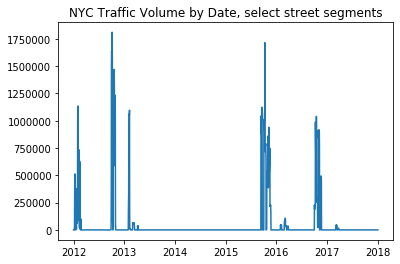

In [8]:
traffic['Date'] = pd.to_datetime(traffic['Date'])
dates = pd.DataFrame({'Date': pd.date_range(start='1/1/2012', end='1/01/2018')})
t_day = traffic[['Date', 'traffic']].groupby(by = 'Date', as_index = False).sum()
t_day.columns = ['Date', 'traffic']
t_day = pd.merge(t_day, dates, on = 'Date', how = 'right')
t_day['traffic'] = np.where(t_day['traffic'] >= 0, t_day['traffic'], 0)
t_day = t_day.sort_values(by = 'Date')
plt.plot(t_day['Date'], t_day['traffic'])
plt.title('NYC Traffic Volume by Date, select street segments')
plt.show()

C:\Users\Andy\anaconda3\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\Andy\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


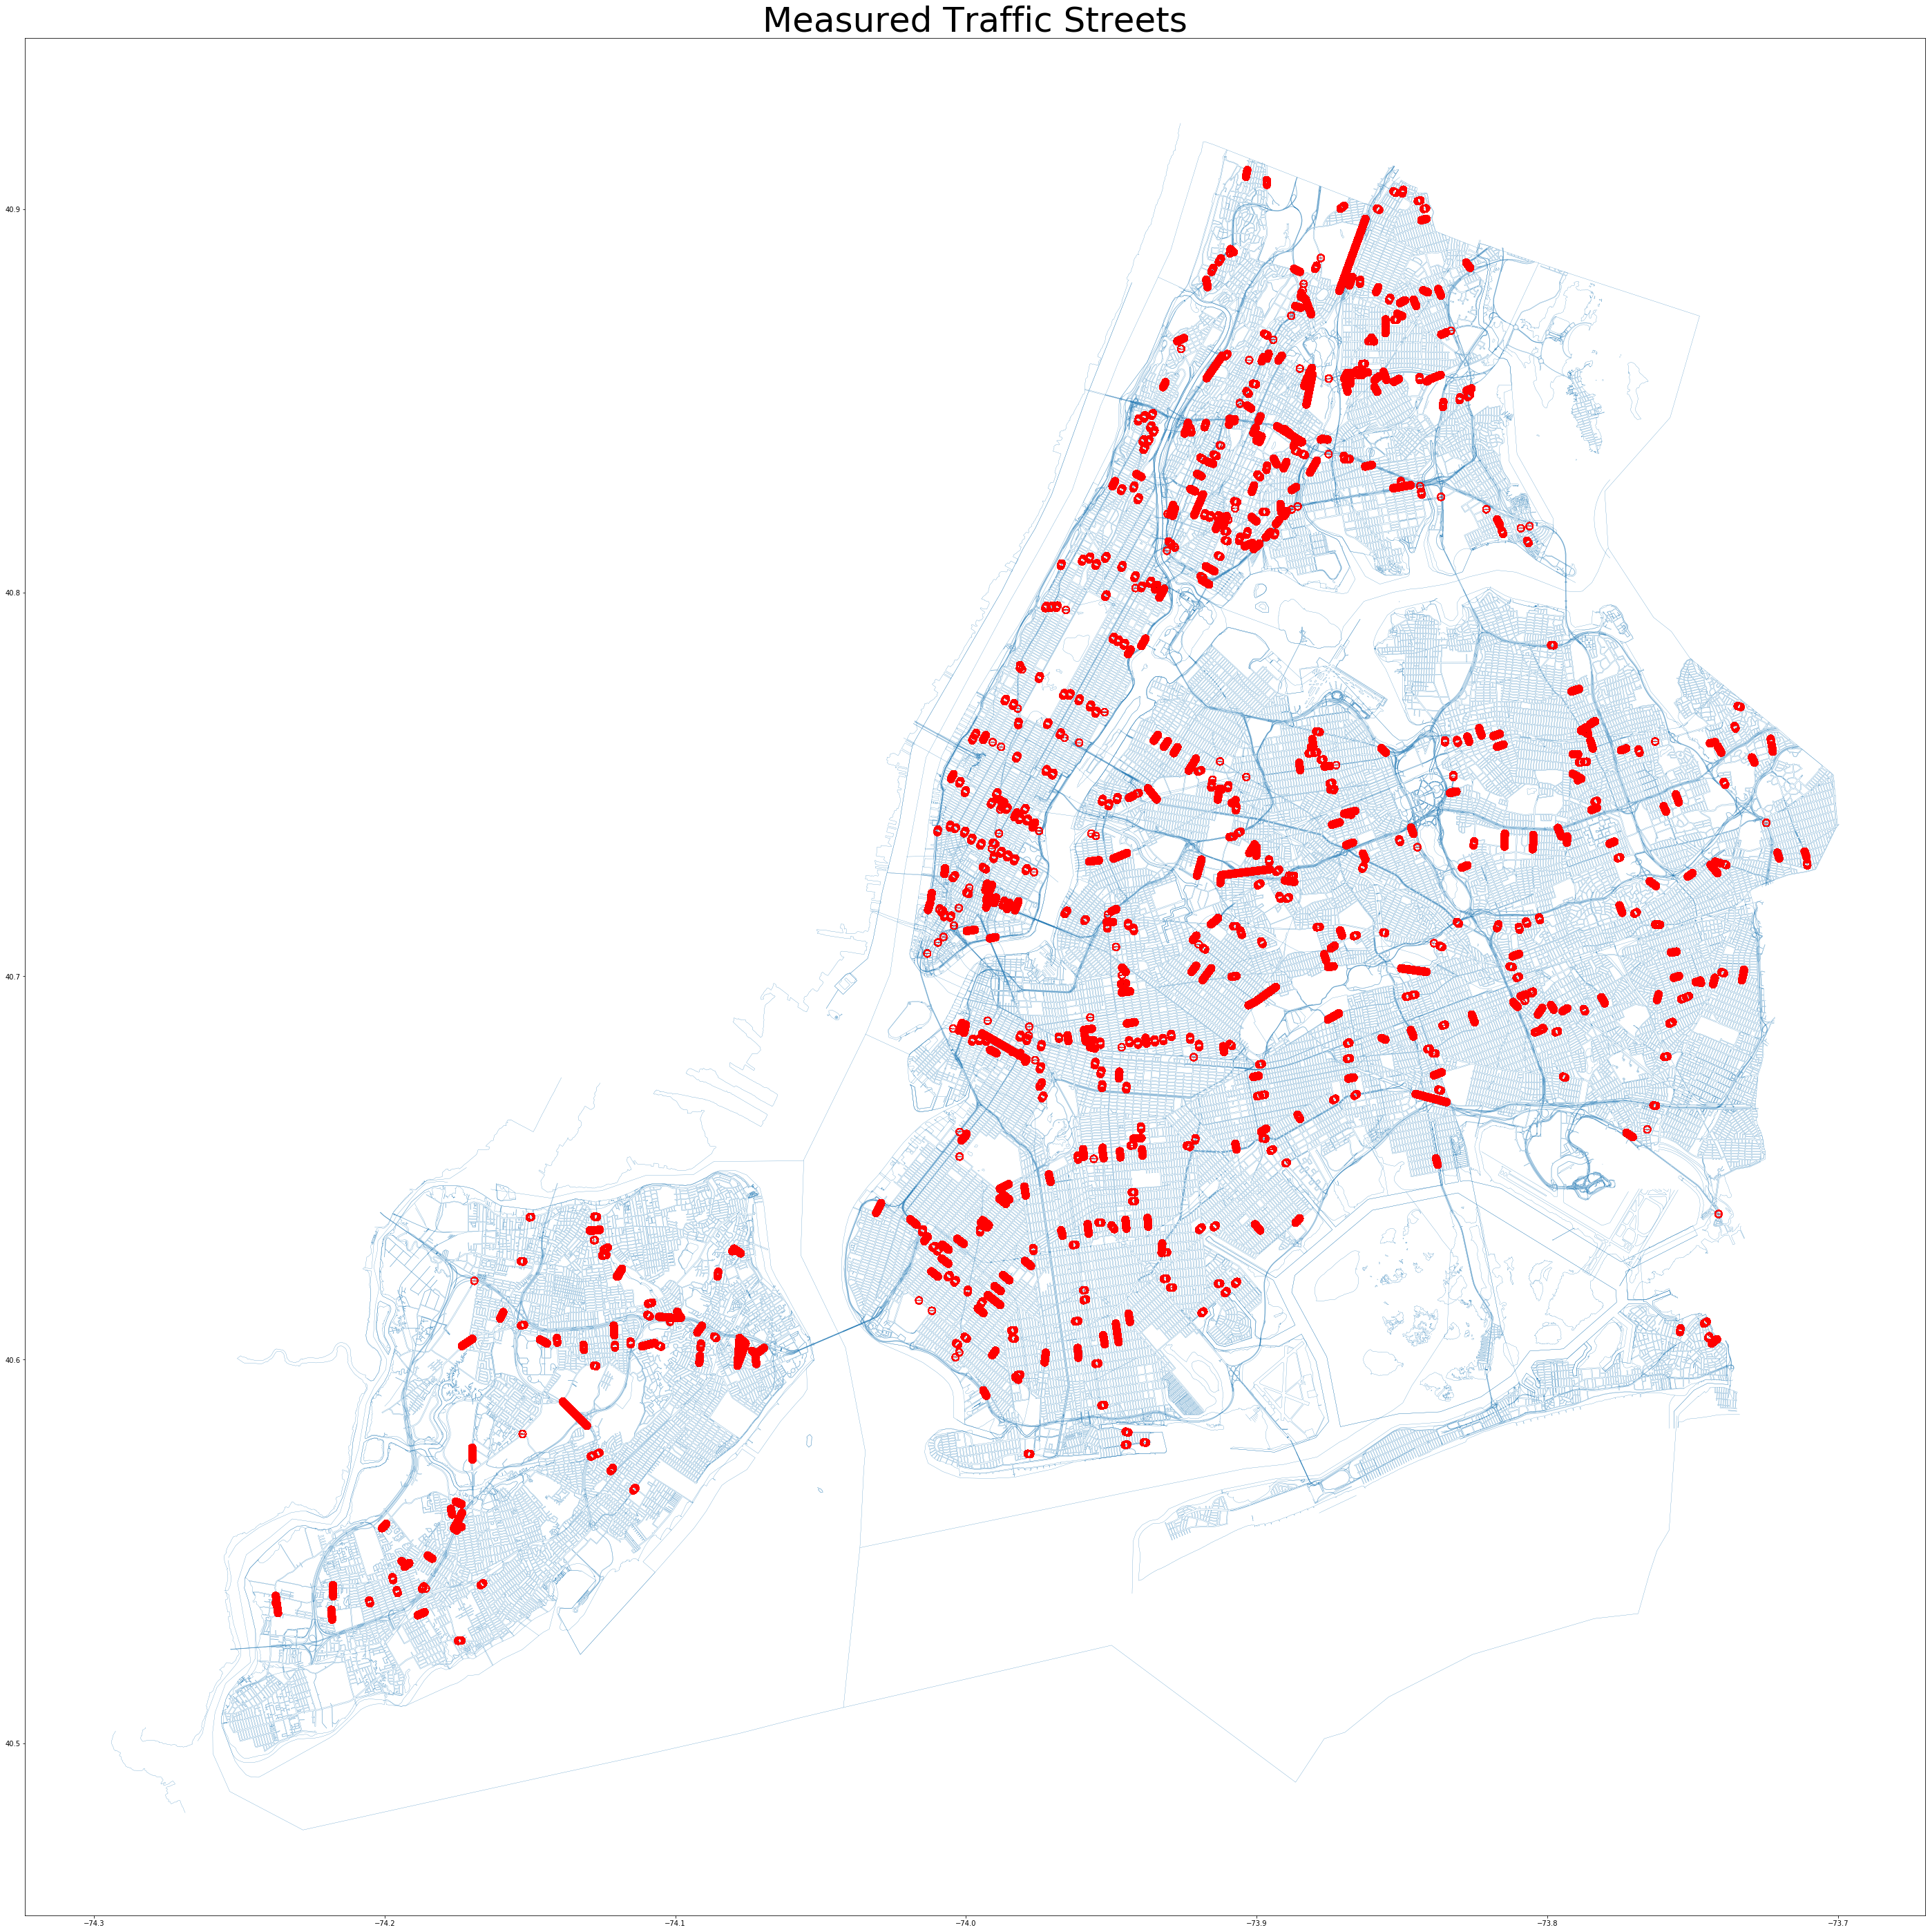

In [9]:
fig, ax = plt.subplots(figsize = (50, 50))
traffic['geometry2'] = traffic['geometry'].boundary
traffic = gpd.GeoDataFrame(traffic, geometry = 'geometry2')
traffic = traffic.set_crs(4326, allow_override = True)
streets.to_crs(traffic.crs).plot(ax=ax, figsize = (50, 50), linewidth = 0.25)
traffic.plot(ax=ax, figsize = (50, 50), color = 'red', linewidth = 10)
plt.title('Measured Traffic Streets', fontsize = 50)
fig.show()

In [10]:
traffic_all_avg = traffic[['streetID',
                           'geometry', 'traffic']].groupby(by='streetID', 
                                                           as_index = False).agg({'geometry': ['first'],
                                                                                 'traffic': ['mean']})
traffic_all_avg.columns = ['streetID', 'geometry', 'mean_traffic']
traffic_all_avg['traffic_q'] = pd.qcut(traffic_all_avg['mean_traffic'], 4, ['q1','q2','q3','q4'])
traffic_all_avg = gpd.GeoDataFrame(traffic_all_avg, geometry = 'geometry')
traffic_all_avg['geometry'] = traffic_all_avg['geometry'].boundary

C:\Users\Andy\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


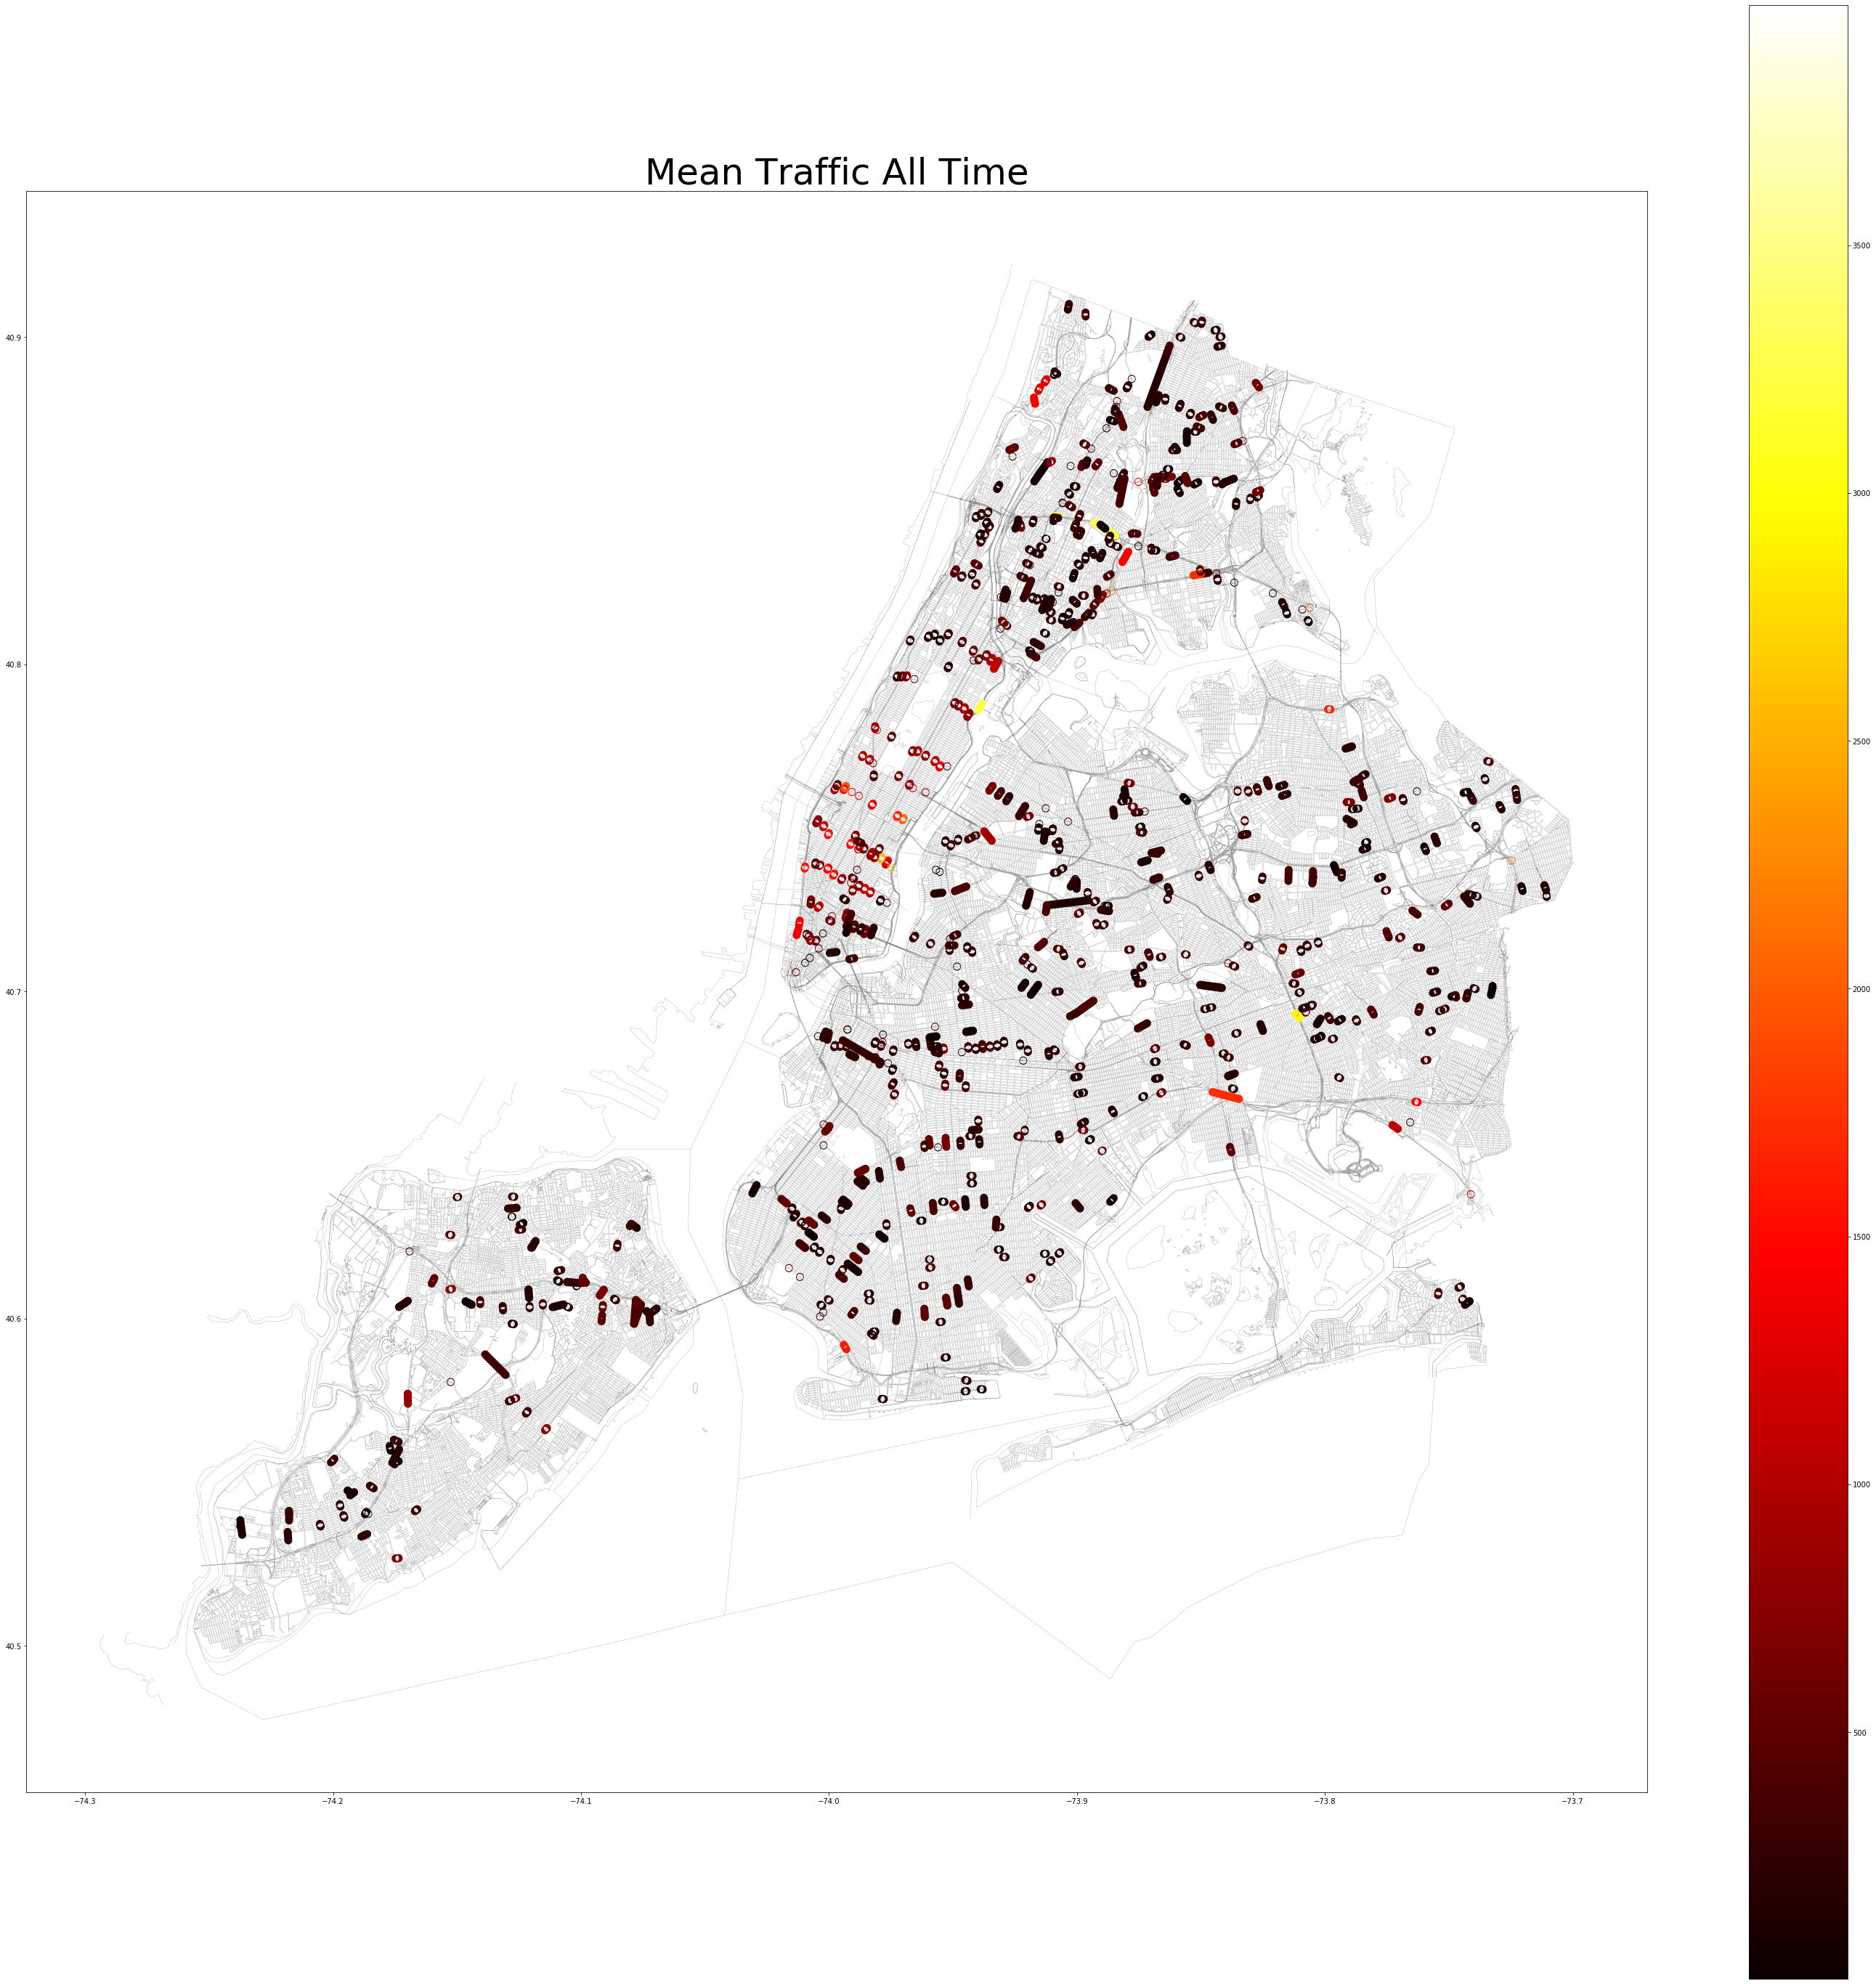

In [11]:
fig, ax = plt.subplots(figsize = (50, 50))
traffic_all_avg = traffic_all_avg.set_crs(4326, allow_override = True)
streets.to_crs(traffic_all_avg.crs).plot(ax=ax, figsize = (50, 50), color = 'grey', linewidth = 0.25)
traffic_all_avg.plot(column = 'mean_traffic', ax=ax, figsize = (50, 50), cmap = 'hot', linewidth = 10, legend = True)
plt.title('Mean Traffic All Time', fontsize = 50)
fig.show()